**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
# To read data from diamonds.csv
# import pandas as pd
# headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
# data = pd.read_csv('diamonds.csv', na_values='?',    
#          header=None,  names = headers) 
# data = data.reset_index(drop=True)
# data = data.iloc[1:]
# data.describe()
#print(data) 



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [18]:
# code for knn regression
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]

#encode
map_cut = {"Fair":1, "Good":2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5}
map_color = {"J": 1,"I":2, "H":3, "G":4, "F":5, "E":6, "D":7}
map_clarity = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

data["map_cut"] = data.cut.map(map_cut)
data["map_color"] = data.color.map(map_color)
data["map_clarity"] = data.clarity.map(map_clarity)

data = data.drop(data.columns[[1,2,3]], axis=1) 
data = data.apply(pd.to_numeric) 
data["table"] = data['table'].astype(float) 


data = data[:100]

#normalize
def normalize_data(col):
    max_val = col.max()
    min_val = col.min()
    for i in range(len(col)):
        col[i] = (col[i]-min_val)/(max_val-min_val)
    return col

col_to_normalize = ["carat","depth","table", "x","y", "z"]
for col in col_to_normalize:
    data[col] = normalize_data(data[col].values)
    
# Separate X and Y data
Y = data.price
X = data.drop('price', axis=1)

#Split test train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

#eucledian
def eucledianDistNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
            eDistance+=round(pow((X_train.iloc[i,j]-X_test[j]),2))
        eDistance = np.sqrt(eDistance)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

# hamming
def hammingDistNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        hDistance=0
        for j in range(len(X_train.columns)):   
            hDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((hDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

# Manhattan 
def manhattanDistNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        mDistance=0
        for j in range(len(X_train.columns)):   
            mDistance+=round(abs(X_train.iloc[i,j]-X_test[j]),2)
        distance.append((mDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

# Predict the output of the numeric variables based on K nearest neighbours
# Output is the mean of the K nearest neighbours
def predict(X_train,Y_train,X_test,K, dist):
    neighbours=[]
    result=[]
    if(dist=="eucledian"):
        for i in range(len(X_test)):
            neighbours.append(eucledianDistNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    elif(dist=="manhattan"):
        for i in range(len(X_test)):
            neighbours.append(manhattanDistNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    elif(dist=="hamming"):
        for i in range(len(X_test)):
            neighbours.append(hammingDistNeighbours(X_train,Y_train,X_test.iloc[i,:],K))
    
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        result.append(mean)
    return result

K=5
eucledian_output=predict(X_train,Y_train,X_test,K, "eucledian")
print("Using Eucledian Distance: ")
print('MAE : {:^0.2f}'.format(mean_absolute_error(Y_test,eucledian_output) ,2))

Using Eucledian Distance: 
MAE : 205.00


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
# give proper explanation

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [11]:
# show all the experiments
# eucledian_output = predict(X_train,Y_train,X_test,5, "eucledian")
manhattan_output = predict(X_train,Y_train,X_test,5, "manhattan")
# hamming_output = predict(X_train,Y_train,X_test,5, "hamming")

def getAllErrors(actual, predicted):
    errors = []
    errors.append(mean_squared_error(actual, predicted, squared=False))
    errors.append(mean_absolute_error(actual, predicted))
    errors.append(r2_score(actual, predicted))
    return errors


eucledianError = getAllErrors(Y_test, eucledian_output)
manhattanError = getAllErrors(Y_test, manhattan_output)
# hammingError = getAllErrors(Y_test, hamming_output)

print (eucledianError)

[524.1973407029075, 205.00000000000006, 0.4312272350238261]


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [12]:
# report a table
headers = ["Eucledian", "Manhattan"]
# headers = ["Eucledian", "Manhattan", "hamming"]
index = ["RMSE", "MAE", "R2-score"]
hammingError = []
list_of_tuples = list(zip(eucledianError, manhattanError))
# list_of_tuples = list(zip(eucledianError, manhattanError, hammingError))
df = pd.DataFrame(list_of_tuples, columns = headers, index=index)
print (df)

           Eucledian   Manhattan
RMSE      524.197341  290.939165
MAE       205.000000  109.170000
R2-score    0.431227    0.824792


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

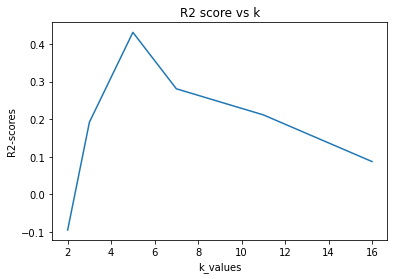

In [20]:
# plot

k_values = [2,3,5,7,11,16]
r2_scores = []
k_r2 = {}
for K in k_values:
    eucledian_output=predict(X_train,Y_train,X_test,K, "eucledian")
    r2Score = r2_score(Y_test, eucledian_output)
    r2_scores.append(r2Score)
    k_r2[K]= r2Score


plt.plot(k_values, r2_scores) 
plt.xlabel('k_values') 
plt.ylabel('R2-scores')
plt.title('R2 score vs k') 
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [21]:
# Explanation

# get best k
best_k = k_values[r2_scores.index(max(r2_scores))]
print ("best K :", best_k)

best K : 5


5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [33]:
# scikit-learn KNN Regressor
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = best_k)
model.fit(X_train, Y_train)  #fit the model
predicted = model.predict(X_test) #make prediction on test set
knn_error = getAllErrors(Y_test, predicted)
df = pd.DataFrame(knn_error, columns = ["KNN"], index=index)
print(df)


                 KNN
RMSE      512.267502
MAE       178.370000
R2-score    0.456821


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [34]:
# Comparison
print ("At best k = ", best_k)
print("R2-score on my KNN's algo : ", max(r2_scores))
print ("R2-score on sklearn KNN algo : ", knn_error[2])

At best k =  5
R2-score on my KNN's algo :  0.4312272350238261
R2-score on sklearn KNN algo :  0.45682124288133874


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [ ]:
#code for Correlation between features and the Diamond Price.

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [ ]:
# import sklearn model

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


In [ ]:
#plot 

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-04 13:14:54--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  6.35MB/s    in 41s     

2021-02-04 13:15:35 (3.99 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

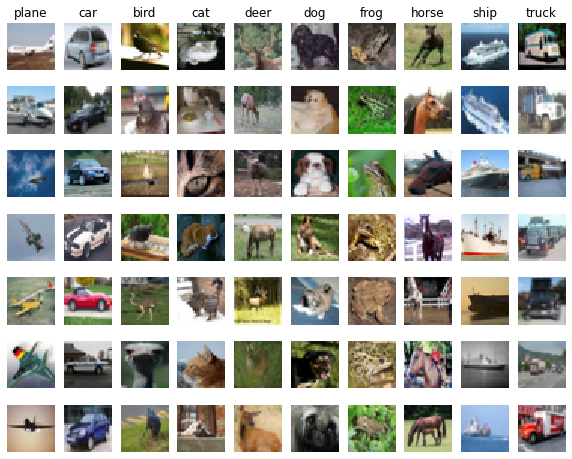

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [6]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(5000, 3072) (500, 3072)


In [13]:
print(min(y_train))

0


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [40]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    X_train = None
    X_test  = None
    Y_train = None
    Y_test  = None
    def __init__(self):
        pass
    
    def train(self, x_train, Y_train):
        self.X_train = x_train
        self.Y_train = y_train
        
    def compute_distances_two_loops(self, x_test):
        self.X_test = x_test
        result = []
        for ind in range(len(self.X_test)):
#             neighbours.append(distNeighbours(X_train,Y_train,X_test.iloc[ind,:],K))
            x_test = self.X_test[ind]
            distance=[]
            for i in range(len(self.X_train)):
                eDistance=0
                for j in range(len(self.X_train[i])):   
                    eDistance+=round(pow((self.X_train[i,j]-x_test[j]),2))
                eDistance = np.sqrt(eDistance)
                distance.append((eDistance,i,self.Y_train[i]))
#                 distance=sorted(distance, key=lambda x: x[0])[0:K]
            result.append(distance)
        return result
    
    def compute_distances_one_loops(self, x_test):
        num_test = len(x_test)
        self.X_test = x_test
        num_train = len(self.X_train)
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            dists[i, :] = np.sum((self.X_train - self.X_test[i, :])**2, axis=1)
        return dists
    
    def compute_distances_no_loop(self, X):
        dists = -2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists
    
    def predict_labels(self, dists, k):
#         complete this 
    
        
    

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [41]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [42]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

KeyboardInterrupt: 

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7
k_values = [3,5,7]
dists = classifier.compute_distances_no_loop(X_test)

for k in k_values:
    y_test_pred = classifier.predict_labels(dists, k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('For k=%d, Got %d / %d correct => accuracy: %f' % (k, num_correct, num_test, accuracy))

Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [ ]:
# Use this cell to call the functions
??

Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to present your timing results for computing distance matrix


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [ ]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

1. a) Implement a decision tree(from scratch using only python data structures) as a class.

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer:

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

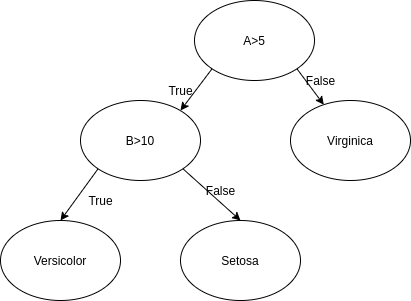
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: